## Arbol de decision, tarea 5 ##

#### Katerine Tapia ####

In [112]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [40]:
# Cargar el dataset
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
data.shape

(891, 12)

In [44]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

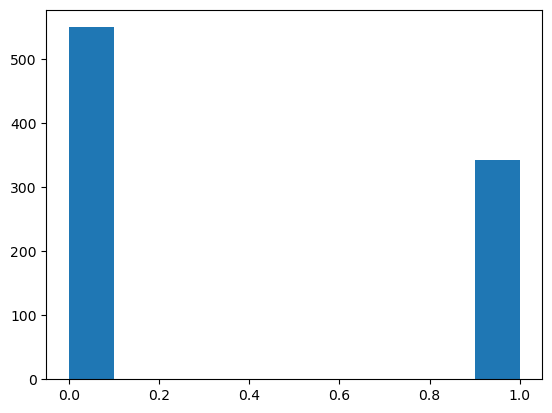

In [48]:
plt.hist(data.Survived)

<Axes: xlabel='PassengerId', ylabel='Pclass'>

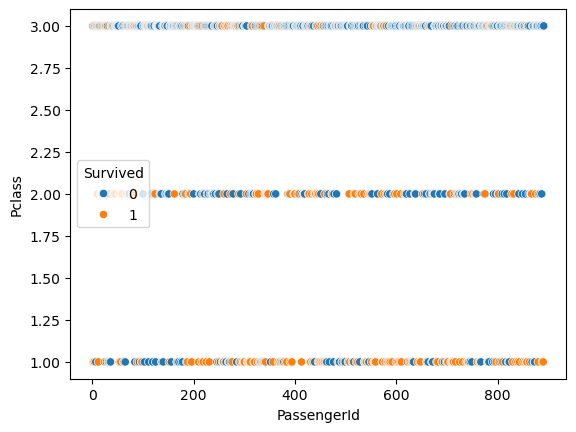

In [50]:
sns.scatterplot(x = "PassengerId", y = "Pclass", hue = "Survived", data = data)

<Axes: xlabel='Age', ylabel='SibSp'>

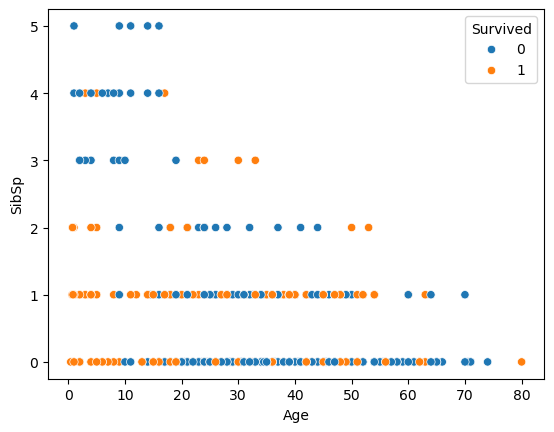

In [52]:
sns.scatterplot(x = "Age", y = "SibSp", hue = "Survived", data = data)

<Axes: xlabel='Parch', ylabel='Fare'>

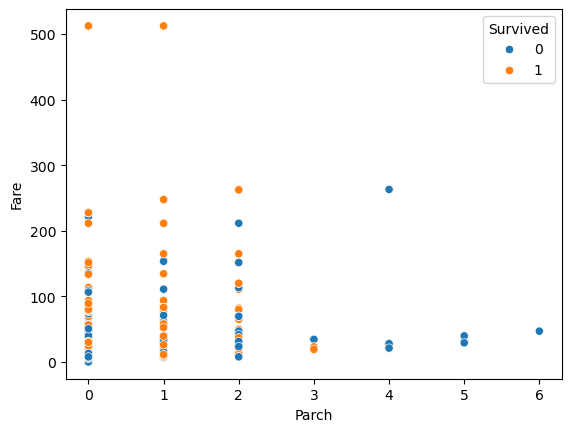

In [54]:
sns.scatterplot(x = "Parch", y = "Fare", hue = "Survived", data = data)

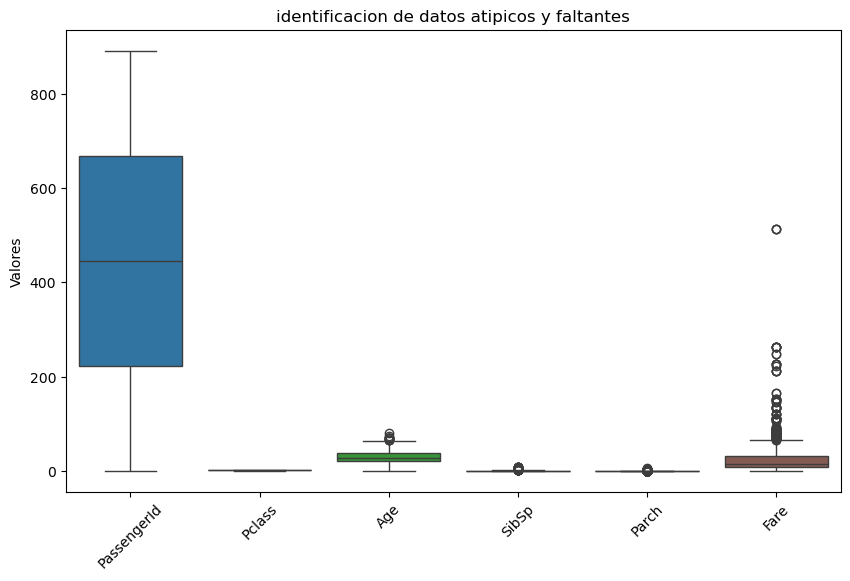

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
plt.xticks(rotation=45)
plt.title('identificacion de datos atipicos y faltantes')
plt.ylabel('Valores')
plt.show()

In [58]:
predictors_col = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
target_col = ["Survived"]

In [60]:
predictors = data[predictors_col]
target = data[target_col]

In [62]:
predictors

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,NaN,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [64]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [66]:
corr = predictors.corr()
corr

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000


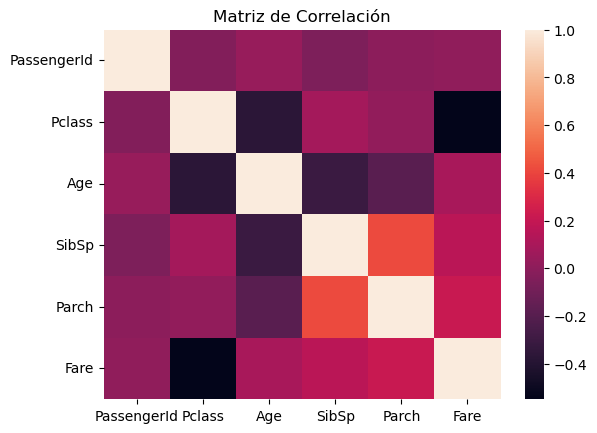

In [68]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [72]:
tree = DecisionTreeClassifier()

In [78]:
arbol = tree.fit(X_train, y_train)

[Text(0.5302314992331288, 0.9761904761904762, 'x[1] <= 2.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(0.1892254601226994, 0.9285714285714286, 'x[5] <= 13.679\ngini = 0.497\nsamples = 327\nvalue = [151.0, 176.0]'),
 Text(0.03987730061349693, 0.8809523809523809, 'x[0] <= 129.5\ngini = 0.416\nsamples = 78\nvalue = [55.0, 23.0]'),
 Text(0.027607361963190184, 0.8333333333333334, 'x[2] <= 49.25\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.02147239263803681, 0.7857142857142857, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.03374233128834356, 0.7857142857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.05214723926380368, 0.8333333333333334, 'x[5] <= 7.75\ngini = 0.375\nsamples = 72\nvalue = [54, 18]'),
 Text(0.046012269938650305, 0.7857142857142857, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.05828220858895705, 0.7857142857142857, 'x[2] <= 27.5\ngini = 0.412\nsamples = 62\nvalue = [44, 18]'),
 Text(0.03067484662576687, 0.7380952380952381, 'x[0

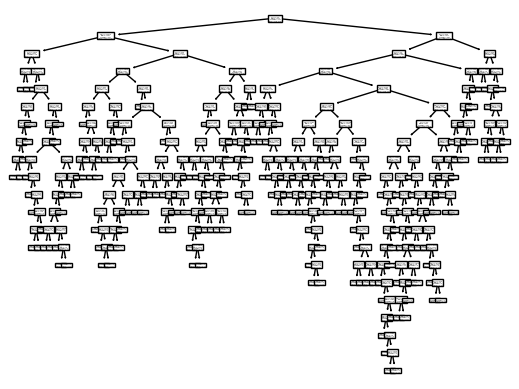

In [84]:
plot_tree(arbol)

In [86]:
predicciones = arbol.predict(X_test)

In [88]:
predicciones

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [90]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,74,36
1,35,34


In [96]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6033519553072626

In [102]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.6044311999824276

In [108]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.6033519553072626

In [114]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.6038731576918002